In [5]:
!pip install rpy2 statsmodels scikit-learn matplotlib pandas numpy --quiet
%load_ext rpy2.ipython


[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [6]:
# Import Packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [7]:
# Question 1
data_2014 = pd.read_csv("data/output/data-2014.csv")
data_2015 = pd.read_csv("data/output/data-2015.csv")
data_2016 = pd.read_csv("data/output/data-2016.csv")
data_2017 = pd.read_csv("data/output/data-2017.csv")
data_2018 = pd.read_csv("data/output/data-2018.csv")
data_2019 = pd.read_csv("data/output/data-2019.csv")

In [8]:
data_2014["year"] = 2014
data_2015["year"] = 2015
data_2016["year"] = 2016
data_2017["year"] = 2017
data_2018["year"] = 2018
data_2019["year"] = 2019

In [9]:
data = pd.concat([data_2014, data_2015, data_2016, data_2017, data_2018, data_2019], ignore_index=True)

## Question 1

In [10]:
question_1 = data[
    (data["snp"] != "Yes") &
    ~((data["planid"] >= 800) & (data["planid"] < 900)) & 
    ~ (data["payment_partc"].isna())].copy()
question_1.head(10)

,contractid,planid,fips,year,n_nonmiss,avg_enrollment,first_enrollment,last_enrollment,state,county,...,payment_partc,rebate_partc,year_reb,payment_partd,directsubsidy_partd,reinsurance_partd,costsharing_partd,riskscore_partd,basic_premium,bid
2,H0028,2.0,19153.0,2014,2,347.0,346.0,348.0,IA,Polk,...,744.91,49.83,2014.0,105.11,41.05,26.97,37.09,0.910,0.0,806.179654
3,H0028,3.0,19155.0,2014,2,173.0,165.0,181.0,IA,Pottawattamie,...,778.05,30.69,2014.0,110.04,43.02,29.06,37.96,0.983,0.0,844.788274
4,H0028,4.0,15003.0,2014,2,1019.5,1034.0,1005.0,HI,Honolulu,...,720.07,48.97,2014.0,70.39,41.78,14.45,14.16,0.829,0.0,861.327751
5,H0028,4.0,15007.0,2014,2,177.0,159.0,195.0,HI,Kauai,...,720.07,48.97,2014.0,70.39,41.78,14.45,14.16,0.829,0.0,861.327751
6,H0028,4.0,15009.0,2014,2,238.5,222.0,255.0,HI,Maui,...,720.07,48.97,2014.0,70.39,41.78,14.45,14.16,0.829,0.0,861.327751
7,H0028,5.0,15003.0,2014,2,234.5,220.0,249.0,HI,Honolulu,...,753.95,30.81,2014.0,79.56,39.88,14.66,25.02,0.748,0.0,1105.498534
8,H0028,5.0,15007.0,2014,2,30.0,24.0,36.0,HI,Kauai,...,753.95,30.81,2014.0,79.56,39.88,14.66,25.02,0.748,0.0,1105.498534
9,H0028,5.0,15009.0,2014,2,87.5,80.0,95.0,HI,Maui,...,753.95,30.81,2014.0,79.56,39.88,14.66,25.02,0.748,0.0,1105.498534
10,H0084,1.0,17001.0,2014,2,24.0,23.0,25.0,IL,Adams,...,666.17,72.09,2014.0,74.60,35.97,21.15,17.48,0.816,0.0,818.390663
11,H0084,1.0,17005.0,2014,2,14.0,14.0,14.0,IL,Bond,...,666.17,72.09,2014.0,74.60,35.97,21.15,17.48,0.816,0.0,818.390663


In [11]:
plan_counts = (
    question_1
    .groupby(["year", "fips"])["planid"]
    .nunique()
    .reset_index(name="num_unique_plans")
)
plan_counts.head()

,year,fips,num_unique_plans
0,2014,1001.0,9
1,2014,1003.0,19
2,2014,1005.0,8
3,2014,1007.0,6
4,2014,1009.0,9


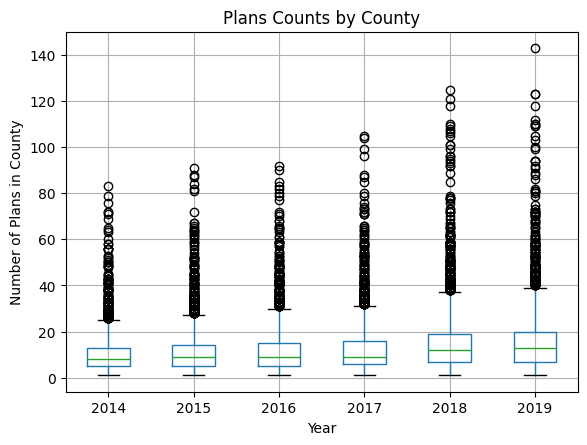

In [12]:
plan_counts.boxplot(column="num_unique_plans", by="year")
plt.title("Plans Counts by County")
plt.suptitle("") 
plt.xlabel("Year")
plt.ylabel("Number of Plans in County")
plt.show()

I believe the number of plans by county is sufficient and is increasing each year, showing increasing competition and options for beneficiaries. 

## Question 2

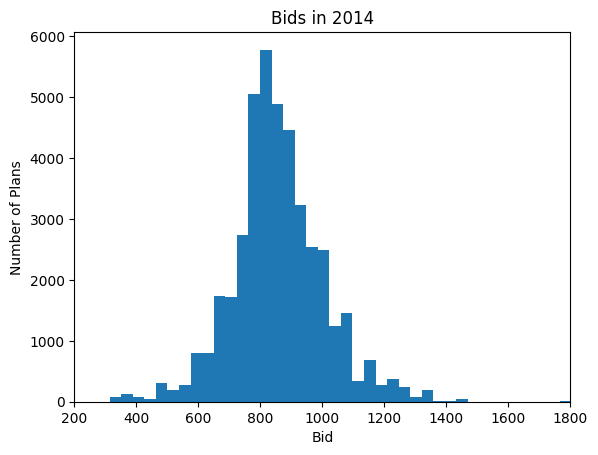

In [13]:
# 2014 Plan Bids
data_2014 = (
    question_1[question_1["year"] == 2014]
    .dropna(subset=["bid"])
)

plt.hist(data_2014.bid, bins=40)
plt.xlim(200, 1800)
plt.xlabel("Bid")
plt.ylabel("Number of Plans")
plt.title("Bids in 2014")
plt.show()

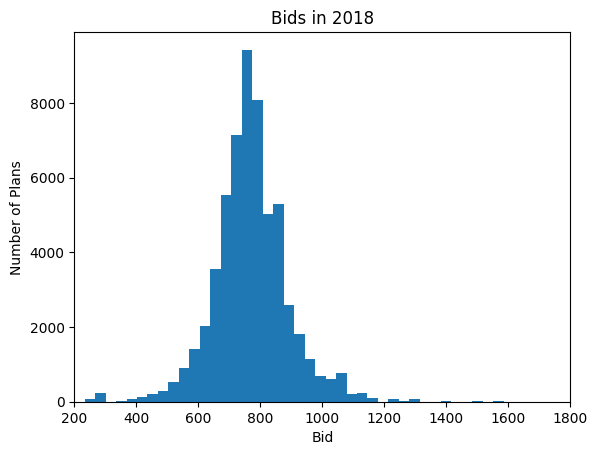

In [14]:
# 2018 Plan Bids
plt.hist(question_1[question_1["year"] == 2018].bid, bins=40)
plt.xlim(200, 1800)
plt.xlabel("Bid")
plt.ylabel("Number of Plans")
plt.title("Bids in 2018")
plt.show()

The bids have become more narrow in their distribution overtime. Additionally, the 2018 data appears to be slightly more to the left which indicated bids decreasing. 

## Question 3

In [15]:
def summarize_fips(group: pd.DataFrame) -> pd.Series:
    total_ma_enrollment = group["avg_enrolled"].iloc[0]

    ma_share = np.where(
        total_ma_enrollment > 0,
        (group["avg_enrollment"] / total_ma_enrollment) * 100.0,
        np.nan,
    )

    hhi_ma = np.nansum(ma_share ** 2)
    plan_count = group[["contractid", "planid"]].drop_duplicates().shape[0]
    avg_premium_partc = group["premium_partc"].mean(skipna=True)
    share_pos_premiums = (group["premium_partc"] > 0).mean()
    avg_bid = group["bid"].mean(skipna=True)
    avg_eligibles = group["avg_eligibles"].iloc[0]

    return pd.Series(
        dict(
            hhi_ma=hhi_ma,
            plan_count=plan_count,
            avg_premium_partc=avg_premium_partc,
            share_pos_premiums=share_pos_premiums,
            avg_bid=avg_bid,
            avg_eligibles=avg_eligibles,
        )
    )

data_clean = data[
    (data["snp"] != "Yes") &
    ~((data["planid"] >= 800) & (data["planid"] < 900)) &
    (data["payment_partc"].notna())
].copy()

question_2 = (
    data_clean
    .groupby(["fips", "year"])
    .apply(summarize_fips)
    .reset_index()
)
question_2.head(10)

/tmp/ipykernel_3658673/3997562701.py:37: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(summarize_fips)


,fips,year,hhi_ma,plan_count,avg_premium_partc,share_pos_premiums,avg_bid,avg_eligibles
0,1001.0,2014,978.511985,13.0,43.133333,0.461538,784.557790,9432.5
1,1001.0,2015,867.664130,17.0,23.841176,0.352941,672.711667,9734.5
2,1001.0,2016,802.494959,19.0,19.221053,0.368421,706.502625,9982.5
3,1001.0,2017,569.951927,17.0,19.047059,0.411765,743.030356,10397.0
4,1001.0,2018,590.249464,19.0,16.857895,0.368421,746.139963,10906.0
5,1001.0,2019,612.381288,19.0,16.315789,0.315789,772.452645,10697.0
6,1003.0,2014,1443.234192,33.0,28.830000,0.151515,799.265464,41563.5
7,1003.0,2015,1434.537043,29.0,11.641379,0.206897,683.761093,43508.0
8,1003.0,2016,1473.551169,39.0,8.074359,0.153846,729.021761,45196.5
9,1003.0,2017,1074.732786,27.0,11.318519,0.222222,752.703315,47630.0


In [16]:
average_HHI = (
    question_2
    .groupby("year", as_index=False)["hhi_ma"]
    .mean()
)
average_HHI.head()

,year,hhi_ma
0,2014,1567.400366
1,2015,1472.516289
2,2016,1431.496730
3,2017,1320.318401
4,2018,1220.415811


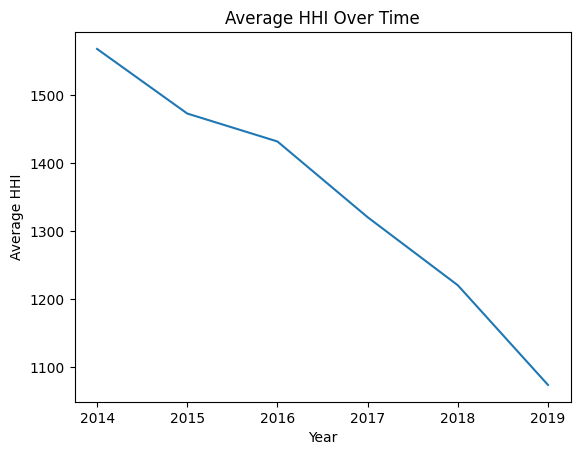

In [17]:
# Plot HHI Overtime
plt.figure()
plt.plot(average_HHI["year"], average_HHI["hhi_ma"])
plt.xlabel("Year")
plt.ylabel("Average HHI")
plt.title("Average HHI Over Time")
plt.show()

The average HHI decreases substantially overtime, indicating competition increasing, on average. 

## Question 4

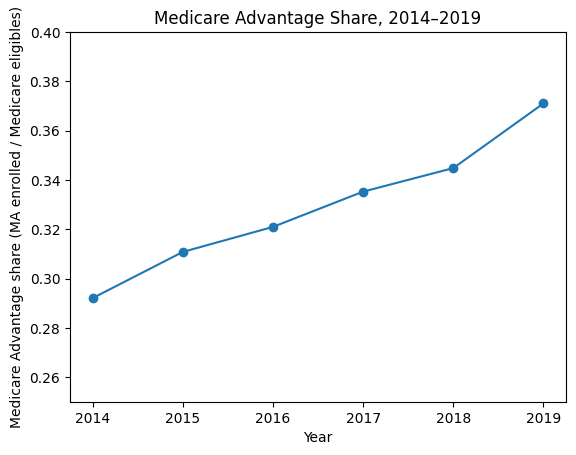

,year,ma_share
0,2014,0.292033
1,2015,0.310788
2,2016,0.320947
3,2017,0.335263
4,2018,0.344817
5,2019,0.371077


In [19]:
county_year = (
    question_1[["fips", "year", "avg_enrolled", "avg_eligibles"]]
    .drop_duplicates()
    .dropna(subset=["avg_enrolled", "avg_eligibles"])
)

avg_ma_share = (
    county_year
    .groupby("year", as_index=False)
    .agg(
        enrolled=("avg_enrolled", "sum"),
        eligibles=("avg_eligibles", "sum"),
    )
)

avg_ma_share["ma_share"] = avg_ma_share["enrolled"] / avg_ma_share["eligibles"]

plt.figure()
plt.plot(avg_ma_share["year"], avg_ma_share["ma_share"], marker="o")
plt.xlabel("Year")
plt.ylabel("Medicare Advantage share (MA enrolled / Medicare eligibles)")
plt.title("Medicare Advantage Share, 2014–2019")
plt.ylim(0.25, 0.4)
plt.show()

avg_ma_share[["year", "ma_share"]]


MA has rapidly increased in popularity over the five years represented. 

## Question 5

In [20]:
# Use only 2018 data
question_5 = question_2[question_2["year"] == 2018].copy()
question_5.head()

,fips,year,hhi_ma,plan_count,avg_premium_partc,share_pos_premiums,avg_bid,avg_eligibles
4,1001.0,2018,590.249464,19.0,16.857895,0.368421,746.139963,10906.0
10,1003.0,2018,1040.491076,51.0,6.141176,0.117647,758.282743,50770.0
16,1005.0,2018,846.375420,15.0,14.806667,0.333333,762.300507,6496.0
22,1007.0,2018,878.705600,12.0,16.900000,0.333333,738.696360,4995.0
28,1009.0,2018,937.835486,19.0,14.563158,0.368421,738.299038,12646.0


In [21]:
# Average HHI = 0.03283 
p33 = question_5["hhi_ma"].quantile(0.33)
competitive = question_5[
    question_5["hhi_ma"] <= p33
].copy()

competitive.shape

(1000, 8)

In [22]:
p66 = question_5["hhi_ma"].quantile(0.66)
uncompetitive = question_5[
    question_5["hhi_ma"] >= p66
].copy()

uncompetitive.shape

(1030, 8)

In [23]:
comp_wavg = np.average(competitive["avg_bid"], weights=competitive["plan_count"])
uncomp_wavg = np.average(uncompetitive["avg_bid"], weights=uncompetitive["plan_count"])
summary_table = pd.DataFrame({
    "market_type": ["Competitive", "Uncompetitive"],
    "plan_weighted_avg_bid": [comp_wavg, uncomp_wavg]
})

print(summary_table.round(2))

     market_type  plan_weighted_avg_bid
0    Competitive                 783.05
1  Uncompetitive                 764.79


In [24]:
#The average bid for competitive markets is $783.05 whereas the average for uncompetitive markets is $764.79. 
#This is counterintuitive but could be due to comepetitive areas having higher costs of care, such as in urban areas.

## Question 6

In [25]:
data_2018_2 = pd.read_csv("data/output/data-2018-2.csv")
data_2018_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64436 entries, 0 to 64435
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   contractid           64436 non-null  object 
 1   planid               64436 non-null  float64
 2   fips                 64436 non-null  float64
 3   year                 64436 non-null  int64  
 4   n_nonmiss            64436 non-null  int64  
 5   avg_enrollment       28304 non-null  float64
 6   first_enrollment     28304 non-null  float64
 7   last_enrollment      28304 non-null  float64
 8   state                64436 non-null  object 
 9   county               64436 non-null  object 
 10  org_type             64436 non-null  object 
 11  plan_type            64436 non-null  object 
 12  partd                64436 non-null  object 
 13  snp                  64436 non-null  object 
 14  eghp                 64436 non-null  object 
 15  org_name             64436 non-null 

In [26]:
clean_2018 = data_2018_2[
    (data_2018_2["snp"] != "Yes") &
    ~((data_2018_2["planid"] >= 800) & (data_2018_2["planid"] < 900)) & 
    ~ (data_2018_2["payment_partc"].isna())].copy()
clean_2018.head(10)

,contractid,planid,fips,year,n_nonmiss,avg_enrollment,first_enrollment,last_enrollment,state,county,...,costsharing_partd,riskscore_partd,parta_enroll,parta_reimb,partb_enroll,partb_reimb,mean_risk,year_ffs,basic_premium,bid
12,H0028,4.0,15003.0,2018,2,2880.5,2909.0,2852.0,HI,Honolulu,...,24.72,0.904,76625.0,198161786.0,59102.0,182990122.0,0.833,2018.0,0.0,676.867347
13,H0028,4.0,15007.0,2018,2,1461.0,1462.0,1460.0,HI,Kauai,...,24.72,0.904,6730.0,17199086.0,5473.0,16635989.0,0.795,2018.0,0.0,676.867347
14,H0028,4.0,15009.0,2018,2,2360.0,2366.0,2354.0,HI,Maui,...,24.72,0.904,10725.0,27670770.0,8246.0,25732595.0,0.811,2018.0,0.0,676.867347
15,H0028,8.0,19011.0,2018,2,185.5,185.0,186.0,IA,Benton,...,38.77,1.001,3205.0,10955851.0,3004.0,12680716.0,0.941,2018.0,0.0,657.469077
16,H0028,8.0,19013.0,2018,2,594.0,585.0,603.0,IA,Black Hawk,...,38.77,1.001,16667.0,57677066.0,15618.0,73586765.0,1.020,2018.0,0.0,657.469077
17,H0028,8.0,19015.0,2018,2,138.0,138.0,138.0,IA,Boone,...,38.77,1.001,3690.0,13197033.0,3451.0,13758014.0,0.951,2018.0,0.0,657.469077
18,H0028,8.0,19017.0,2018,2,16.5,16.0,17.0,IA,Bremer,...,38.77,1.001,4228.0,14934227.0,4014.0,20639891.0,0.903,2018.0,0.0,657.469077
19,H0028,8.0,19019.0,2018,2,114.0,114.0,114.0,IA,Buchanan,...,38.77,1.001,3048.0,12231927.0,2873.0,13330365.0,0.914,2018.0,0.0,657.469077
20,H0028,8.0,19021.0,2018,0,NaN,NaN,NaN,IA,Buena Vista,...,38.77,1.001,2821.0,9709743.0,2668.0,12134053.0,0.935,2018.0,0.0,657.469077
21,H0028,8.0,19023.0,2018,2,37.5,39.0,36.0,IA,Butler,...,38.77,1.001,2848.0,10130745.0,2704.0,13289658.0,0.956,2018.0,0.0,657.469077


In [27]:
ffs_2018 = (
    clean_2018
    .groupby(["year", "county"], as_index=False)
    .agg(
        avg_eligibles=("avg_eligibles", "first"),
        avg_enrolled=("avg_enrolled", "first"),
        parta_reimb=("parta_reimb", "first"),
        partb_reimb=("partb_reimb", "first")
    )
)
ffs_2018["ffs_enrollment"] = (
    ffs_2018["avg_eligibles"] - ffs_2018["avg_enrolled"]
)
ffs_2018["ffs_spending"] = (
    ffs_2018["parta_reimb"] + ffs_2018["partb_reimb"]
)
ffs_2018["ffs_cost"] = (
    ffs_2018["ffs_spending"] / ffs_2018["ffs_enrollment"]
)
ffs_2018.head()

,year,county,avg_eligibles,avg_enrolled,parta_reimb,partb_reimb,ffs_enrollment,ffs_spending,ffs_cost
0,2018,Abbeville,6272.5,2161.5,9775511.0,11404738.0,4111.0,21180249.0,5152.091705
1,2018,Acadia,11339.5,1741.5,32601252.0,29148778.0,9598.0,61750030.0,6433.635132
2,2018,Accomack,8938.0,1418.5,21625965.0,24487279.0,7519.5,46113244.0,6132.488064
3,2018,Ada,75541.0,35305.5,78426526.0,93972910.0,40235.5,172399436.0,4284.759379
4,2018,Adair,1703.5,156.0,3992001.0,5201755.0,1547.5,9193756.0,5941.037803


In [28]:
clean_2018 = clean_2018.merge(
    ffs_2018[["year", "county", "ffs_cost"]],
    on=["year", "county"],
    how="left"
)
clean_2018.head()

,contractid,planid,fips,year,n_nonmiss,avg_enrollment,first_enrollment,last_enrollment,state,county,...,riskscore_partd,parta_enroll,parta_reimb,partb_enroll,partb_reimb,mean_risk,year_ffs,basic_premium,bid,ffs_cost
0,H0028,4.0,15003.0,2018,2,2880.5,2909.0,2852.0,HI,Honolulu,...,0.904,76625.0,198161786.0,59102.0,182990122.0,0.833,2018.0,0.0,676.867347,4096.117311
1,H0028,4.0,15007.0,2018,2,1461.0,1462.0,1460.0,HI,Kauai,...,0.904,6730.0,17199086.0,5473.0,16635989.0,0.795,2018.0,0.0,676.867347,3717.118923
2,H0028,4.0,15009.0,2018,2,2360.0,2366.0,2354.0,HI,Maui,...,0.904,10725.0,27670770.0,8246.0,25732595.0,0.811,2018.0,0.0,676.867347,3480.747271
3,H0028,8.0,19011.0,2018,2,185.5,185.0,186.0,IA,Benton,...,1.001,3205.0,10955851.0,3004.0,12680716.0,0.941,2018.0,0.0,657.469077,5640.512349
4,H0028,8.0,19013.0,2018,2,594.0,585.0,603.0,IA,Black Hawk,...,1.001,16667.0,57677066.0,15618.0,73586765.0,1.020,2018.0,0.0,657.469077,7584.654956


In [29]:
q25 = ffs_2018["ffs_cost"].quantile(0.25)
ffs_2018["q1"] = (ffs_2018["ffs_cost"] <= q25).astype(int)

In [30]:
q50 = ffs_2018["ffs_cost"].quantile(0.50)
ffs_2018["q2"] = (
    (ffs_2018["ffs_cost"] > q25) &
    (ffs_2018["ffs_cost"] <= q50)
).astype(int)

In [31]:
q75 = ffs_2018["ffs_cost"].quantile(0.75)
ffs_2018["q3"] = (
    (ffs_2018["ffs_cost"] > q50) &
    (ffs_2018["ffs_cost"] <= q75)
).astype(int)

In [32]:
ffs_2018["q4"] = (ffs_2018["ffs_cost"] > q75).astype(int)

In [33]:
clean_2018 = clean_2018.merge(
    ffs_2018[["year", "county", "q1", "q2", "q3", "q4"]],
    on=["year", "county"],
    how="left"
)

In [34]:
# Table with average bids in each quartile 
results = []

for q in ["q1", "q2", "q3", "q4"]:
    
    avg_when_1 = clean_2018.loc[clean_2018[q] == 1, "bid"].mean()
    avg_when_0 = clean_2018.loc[clean_2018[q] == 0, "bid"].mean()
    
    results.append({
        "quartile": q,
        "treated": avg_when_1,
        "control": avg_when_0
    })

final_table = pd.DataFrame(results)

print(final_table)

  quartile     treated     control
0       q1  778.055411  766.090490
1       q2  772.953790  767.707265
2       q3  765.454632  770.324241
3       q4  759.448501  771.975191


## Question 7

In [37]:
# Define treatment in Python the same way
def summarize_fips(group: pd.DataFrame) -> pd.Series:
    total_enroll = pd.to_numeric(group["avg_enrolled"], errors='coerce').iloc[0]
    plan_enroll = pd.to_numeric(group["avg_enrollment"], errors='coerce')
    
    ma_share = np.where(
        total_enroll > 0,
        (plan_enroll / total_enroll) * 100,
        np.nan,
    )

    hhi_ma = np.nansum(ma_share ** 2)
    
    if np.all(np.isnan(ma_share)):
        hhi_ma = np.nan

    plan_count = group[["contractid", "planid"]].drop_duplicates().shape[0]
    avg_premium_partc = group["premium_partc"].mean(skipna=True)
    share_pos_premiums = (group["premium_partc"] > 0).mean()
    avg_bid = group["bid"].mean(skipna=True)
    avg_eligibles = group["avg_eligibles"].iloc[0]
    ffs_cost = group["ffs_cost"].iloc[0]

    return pd.Series(
        dict(
            hhi_ma=hhi_ma,
            plan_count=plan_count,
            avg_premium_partc=avg_premium_partc,
            share_pos_premiums=share_pos_premiums,
            avg_bid=avg_bid,
            avg_eligibles=avg_eligibles,
            ffs_cost=ffs_cost,
        )
    )
question_7 = (
    clean_2018
    .groupby("fips", as_index=False)
    .apply(summarize_fips)
    .reset_index(drop=True)
)
q_hhi_py = question_7["hhi_ma"].quantile([0.33, 0.66])
low_q, high_q = q_hhi_py.loc[0.33], q_hhi_py.loc[0.66]

lp_df = question_7.copy()
lp_df["treated_dummy"] = np.where(
    lp_df["hhi_ma"] >= high_q, 1,
    np.where(lp_df["hhi_ma"] <= low_q, 0, np.nan)
)
lp_df = lp_df.dropna(subset=["treated_dummy"])
lp_df = lp_df.dropna(subset=["ffs_cost"])
lp_df["ffs_q"] = pd.qcut(
    lp_df["ffs_cost"],
    4,
    labels=[1,2,3,4]
).astype(int)

ffs_dummies = pd.get_dummies(lp_df["ffs_q"], prefix="q", drop_first=True)

lp_df = pd.concat([lp_df, ffs_dummies], axis=1)

lp_vars = lp_df[[
    "avg_bid",
    "treated_dummy",
    "q_2", "q_3", "q_4"
]].dropna().copy()

lp_covs = lp_vars[["q_2", "q_3", "q_4"]].copy()

lp_vars["treated_dummy"] = lp_vars["treated_dummy"].astype(int)

/tmp/ipykernel_3658673/1056180479.py:38: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(summarize_fips)


In [39]:
%%R -i lp_vars -i lp_covs -o ate_raw -o se_raw
library(Matching)

m.nn.var2 <- Matching::Match(
  Y        = lp_vars$avg_bid,
  Tr       = lp_vars$treated_dummy,
  X        = lp_covs,
  M        = 1,
  Weight   = 1,
  estimand = "ATE"
)

cat("NN (Weight=1, M=1), ATE:", m.nn.var2$est[1], "\n")
summary(m.nn.var2)
ate_raw <- m.nn.var2$est[1]
se_raw <- m.nn.var2$se[1]

Increasing memory because of ties: allocating a matrix of size 3 times 377400 doubles.
I would be faster with the ties=FALSE option.
Increasing memory because of ties: allocating a matrix of size 3 times 566100 doubles.
I would be faster with the ties=FALSE option.
NN (Weight=1, M=1), ATE: -29.98343 

Estimate...  -29.983 
AI SE......  3.0245 
T-stat.....  -9.9135 
p.val......  < 2.22e-16 

Original number of observations..............  1887 
Original number of treated obs...............  958 
Matched number of observations...............  1887 
Matched number of observations  (unweighted).  438970 



Loading required package: MASS
## 
##  Matching (Version 4.10-15, Build Date: 2024-10-14)
##  See https://www.jsekhon.com for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##

In addition: Warning messages:
1: In MatchLoopCfast(N = s1$N, xvars = Kx, All = s1$All, M = s1$M,  :
  Increasing memory because of ties.  I would be faster with the ties=FALSE option.
2: In MatchLoopCfast(N = s1$N, xvars = Kx, All = s1$All, M = s1$M,  :
  Increasing memory because of ties.  I would be faster with the ties=FALSE option.


In [40]:
%%R -o ate_mah -o se_mah
# 2.3 Nearest neighbor, Mahalanobis (Weight=2) -------------------------
m.nn.md <- Matching::Match(
  Y        = lp_vars$avg_bid,
  Tr       = lp_vars$treated_dummy,
  X        = lp_covs,
  M        = 1,
  Weight   = 2,
  estimand = "ATE"
)

cat("NN (Mahalanobis), ATE:", m.nn.md$est[1], "\n")
summary(m.nn.md)
ate_mah <- m.nn.md$est[1]
se_mah <- m.nn.var2$se[1]

Increasing memory because of ties: allocating a matrix of size 3 times 377400 doubles.
I would be faster with the ties=FALSE option.
Increasing memory because of ties: allocating a matrix of size 3 times 566100 doubles.
I would be faster with the ties=FALSE option.
NN (Mahalanobis), ATE: -29.98343 

Estimate...  -29.983 
AI SE......  3.0245 
T-stat.....  -9.9135 
p.val......  < 2.22e-16 

Original number of observations..............  1887 
Original number of treated obs...............  958 
Matched number of observations...............  1887 
Matched number of observations  (unweighted).  438970 



In addition: Warning messages:
1: In MatchLoopCfast(N = s1$N, xvars = Kx, All = s1$All, M = s1$M,  :
  Increasing memory because of ties.  I would be faster with the ties=FALSE option.
2: In MatchLoopCfast(N = s1$N, xvars = Kx, All = s1$All, M = s1$M,  :
  Increasing memory because of ties.  I would be faster with the ties=FALSE option.


In [41]:
%%R -o ate_ipw -o se_ipw
library(dplyr)

# Propensity scores -----------------------------------------------------
logit.model <- glm(
  treated_dummy ~ q_2 + q_3 + q_4,
  family = binomial,
  data   = lp_vars
)
ps <- fitted(logit.model)
# Attach PS and IPW to lp.vars -----------------------------------------
lp_vars <- lp_vars %>%
  mutate(
    ps  = ps,
    ipw = case_when(
      treated_dummy == 1 ~ 1 / ps,
      treated_dummy == 0 ~ 1 / (1 - ps),
      TRUE ~ NA_real_
    )
  )

glimpse(lp_vars)
# 2.4 Nearest neighbor, propensity score -------------------------------
m.nn.ps <- Matching::Match(
  Y        = lp_vars$avg_bid,
  Tr       = lp_vars$treated_dummy,
  X        = lp_vars$ps,
  M        = 1,
  estimand = "ATE"
)

cat("NN (propensity score), ATE:", m.nn.ps$est[1], "\n")
summary(m.nn.ps)
ate_ipw <- m.nn.ps$est[1]
se_ipw <- m.nn.ps$se[1]

Rows: 1,887
Columns: 7
$ avg_bid       <dbl> 746.1400, 764.9581, 772.4664, 752.6910, 781.0256, 766.79…
$ treated_dummy <int> 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ q_2           <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ q_3           <lgl> FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, TRUE, TRUE, TRU…
$ q_4           <lgl> FALSE, FALSE, TRUE, FALSE, FALSE, TRUE, FALSE, FALSE, FA…
$ ps            <dbl> 0.5222930, 0.5877378, 0.4258475, 0.4946921, 0.5877378, 0…
$ ipw           <dbl> 2.093333, 2.425641, 2.348259, 1.978992, 1.701439, 2.3482…
Increasing memory because of ties: allocating a matrix of size 3 times 377400 doubles.
I would be faster with the ties=FALSE option.
Increasing memory because of ties: allocating a matrix of size 3 times 566100 doubles.
I would be faster with the ties=FALSE option.
NN (propensity score), ATE: -29.98343 

Estimate...  -29.983 
AI SE......  3.0245 
T-stat.....  -9.9135 
p.val......  < 2.22e-16 

Original number of o


Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

In addition: Warning messages:
1: In MatchLoopCfast(N = s1$N, xvars = Kx, All = s1$All, M = s1$M,  :
  Increasing memory because of ties.  I would be faster with the ties=FALSE option.
2: In MatchLoopCfast(N = s1$N, xvars = Kx, All = s1$All, M = s1$M,  :
  Increasing memory because of ties.  I would be faster with the ties=FALSE option.


In [42]:
%%R -o ate_reg2 -o se_reg2
# Treated model
reg1.dat <- lp_vars %>% filter(treated_dummy == 1)
reg1 <- lm(avg_bid ~ q_2 + q_3 + q_4, data = reg1.dat)

# Control model
reg0.dat <- lp_vars %>% filter(treated_dummy == 0)
reg0 <- lm(avg_bid ~ q_2 + q_3 + q_4, data = reg0.dat)

# Predict for all counties
pred1 <- predict(reg1, newdata = lp_vars)
pred0 <- predict(reg0, newdata = lp_vars)

ate_reg2 <- mean(pred1 - pred0, na.rm = TRUE)
se_reg2 <- sd(pred1 - pred0, na.rm = TRUE) / sqrt(length(na.omit(pred1 - pred0)))
cat("Two-step regression ATE:", round(ate_reg2, 3), "\n")

Two-step regression ATE: -29.983 


In [55]:
results_table = pd.DataFrame({
    "Estimator": [
        "INV",
        "MAH",
        "IPW",
        "OLS"
    ],
    "ATE": [
        ate_raw,
        ate_mah,
        ate_ipw,
        ate_reg2
    ],
    "SE": [
        se_raw,
        se_mah,
        se_ipw,
        se_reg2
    ]
})

results_table

,Estimator,ATE,SE
0,INV,[-29.983433761967177],[3.024516483945034]
1,MAH,[-29.983433761967177],[3.024516483945034]
2,IPW,[-29.983433761967177],[3.024516483945034]
3,OLS,[-29.983433761966925],[0.1921960382704764]


## Question 8

The estimators are all identical. They should be identical with each of the methodologies.

## Question 9

In [56]:
lp_vars2 = lp_df[[
    "avg_bid",
    "treated_dummy",
    "avg_eligibles",
    "ffs_cost"
]].dropna().copy()

lp_covs2 = lp_vars2[["avg_eligibles", "ffs_cost"]].copy()

lp_vars2["treated_dummy"] = lp_vars2["treated_dummy"].astype(int)

In [57]:
%%R -i lp_vars2 -i lp_covs2
library(Matching)

m.nn.var2 <- Matching::Match(
  Y        = lp_vars2$avg_bid,
  Tr       = lp_vars2$treated_dummy,
  X        = lp_covs2,
  M        = 1,
  Weight   = 1,
  estimand = "ATE"
)

cat("NN (Weight=1, M=1), ATE:", m.nn.var2$est[1], "\n")
summary(m.nn.var2)

NN (Weight=1, M=1), ATE: -34.31121 

Estimate...  -34.311 
AI SE......  3.6417 
T-stat.....  -9.4218 
p.val......  < 2.22e-16 

Original number of observations..............  1887 
Original number of treated obs...............  958 
Matched number of observations...............  1887 
Matched number of observations  (unweighted).  1970 



The estimated treatment effect is much greater in magnitude (-34 versus the original -30)

## Question 10

Working with this data was extremely challenging. One thing I learned is that the difference in bids for competitive versus uncompetitive areas is relatively small. I would have expected uncompetitive areas to have ridiculously high bids. One thing that frustrated me is trying to calculate the ATE as these have to be done in R language. It is very aggravating to have to switch between the two, especially given my little experience with R. 